## Neural Network Assignment - 1 ( Forest Fires)
#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

### Import necessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

### Import Necessary Dataset

In [2]:
forestfire_data = pd.read_csv('D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Neural Networks\\forestfires.csv')
forestfire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


###  Initial Analysis

In [3]:
forestfire_data.shape

(517, 31)

In [4]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forestfire_data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### Visualization of Data parameters

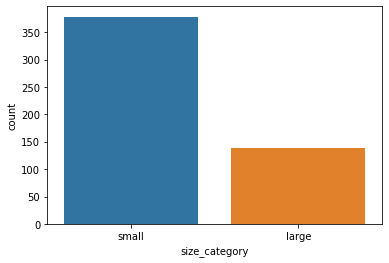

In [6]:
sns.countplot(forestfire_data['size_category'])
plt.show()

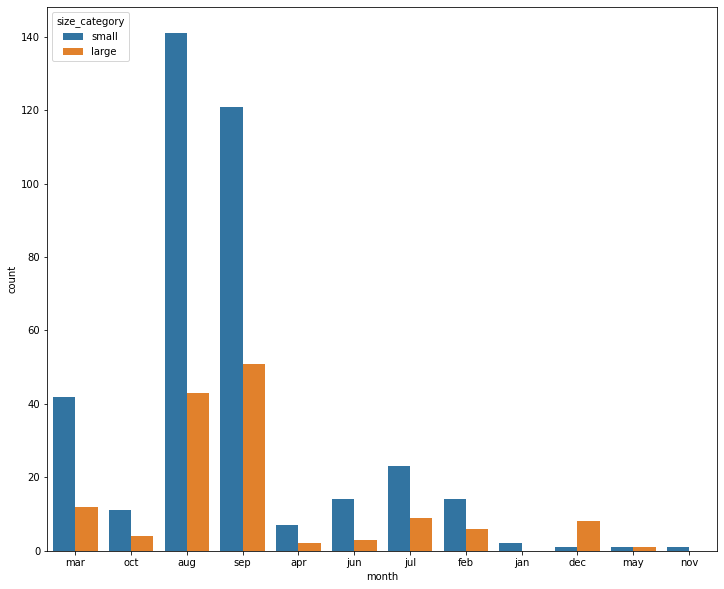

In [7]:
plt.figure(figsize=(12,10))
sns.countplot(x = forestfire_data['month'],hue=forestfire_data['size_category'])
plt.show()

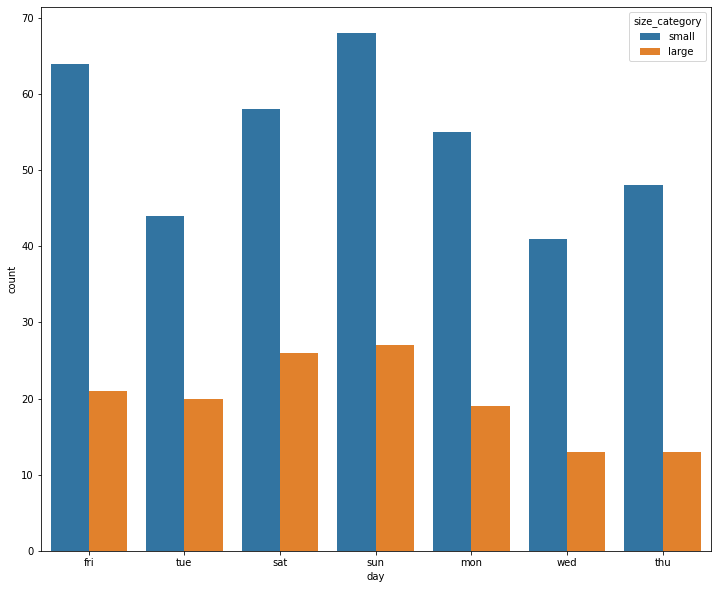

In [8]:
plt.figure(figsize=(12,10))
sns.countplot(x = forestfire_data['day'],hue=forestfire_data['size_category'])
plt.show()

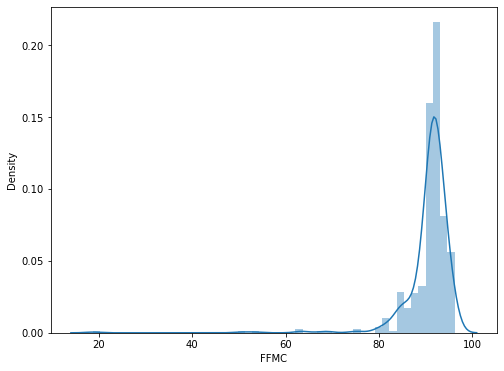

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['FFMC'],)
plt.show()

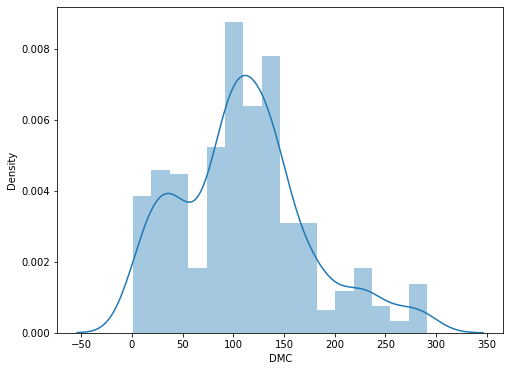

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['DMC'],)
plt.show()

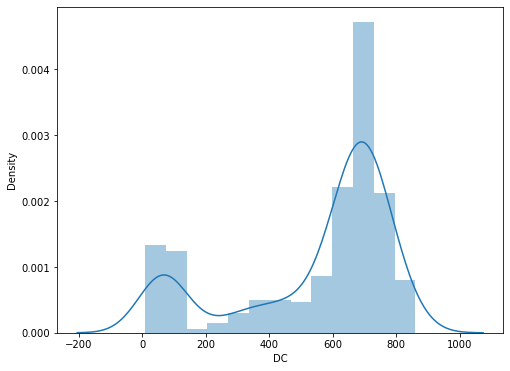

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['DC'],)
plt.show()

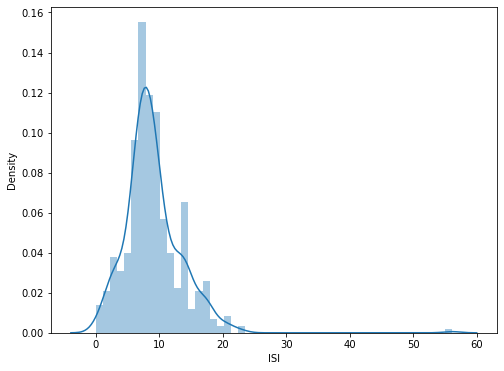

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['ISI'],)
plt.show()

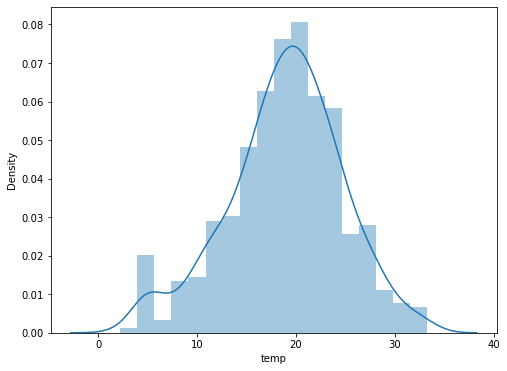

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['temp'],)
plt.show()

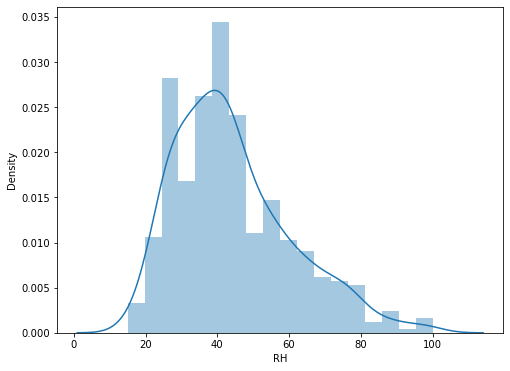

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['RH'],)
plt.show()

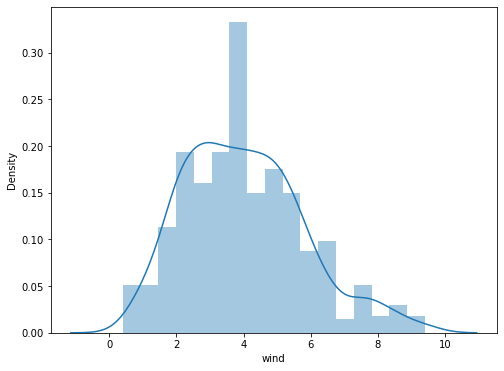

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['wind'],)
plt.show()

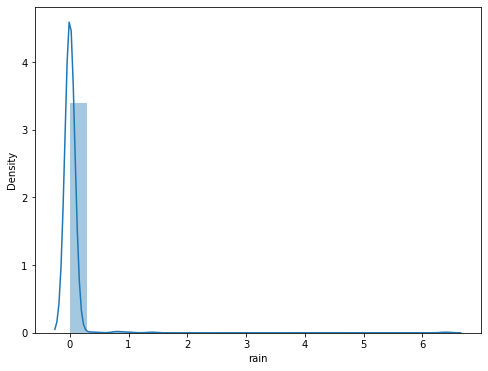

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(forestfire_data['rain'],)
plt.show()

In [17]:
drop_data = forestfire_data.drop(labels=['month','day'],axis = 1)
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [18]:
le = LabelEncoder()
drop_data['size_category'] = le.fit_transform(drop_data['size_category'])
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

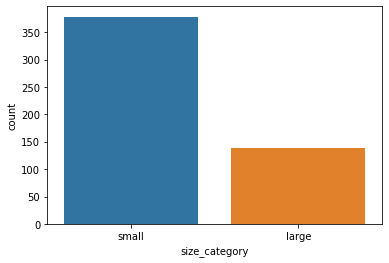

In [19]:
sns.countplot(forestfire_data['size_category'])

In [20]:
drop_data['size_category'].replace({'small':0,'large':0},inplace = True)

In [21]:
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
corr = drop_data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


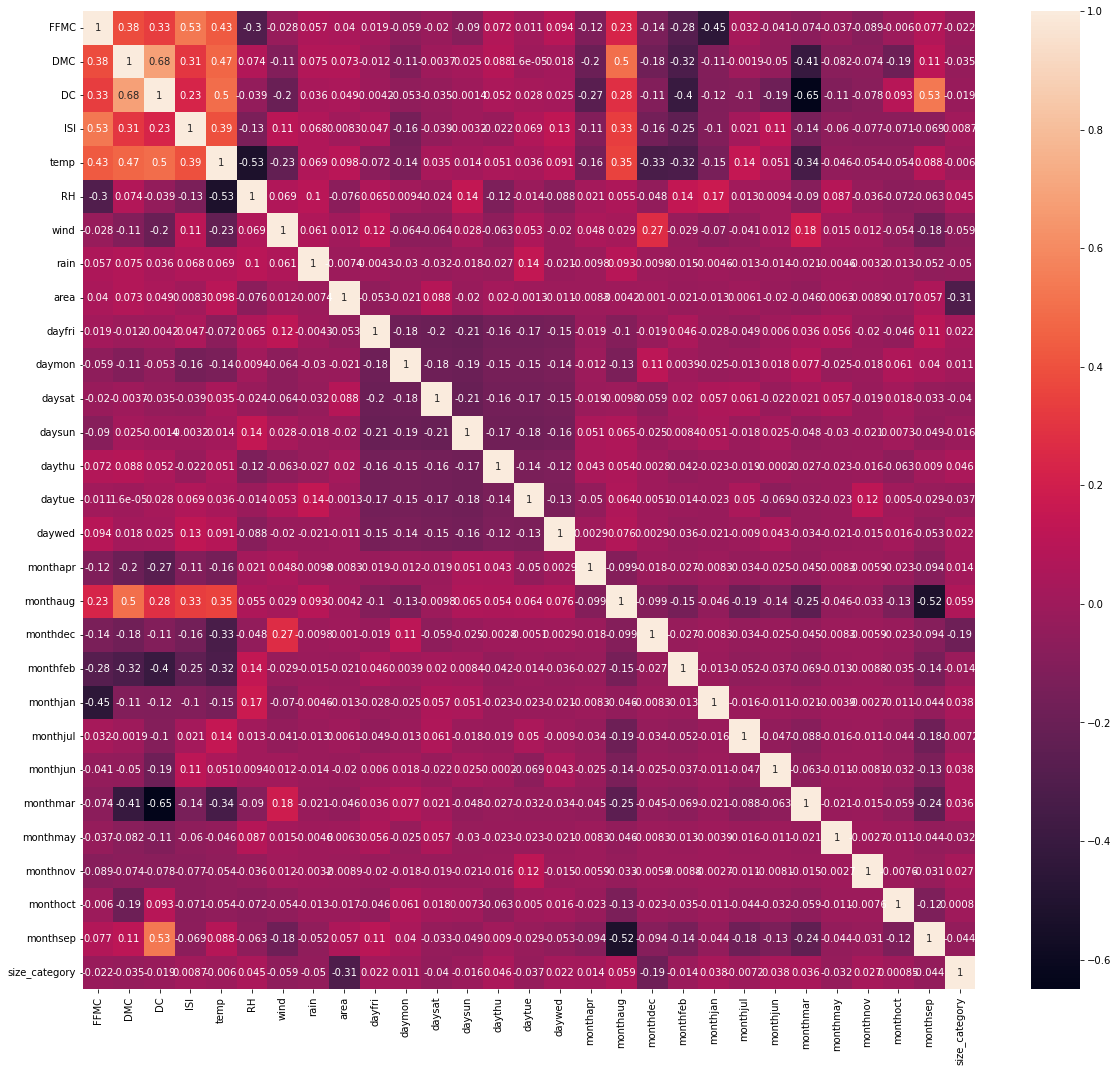

In [23]:
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True)
plt.show()

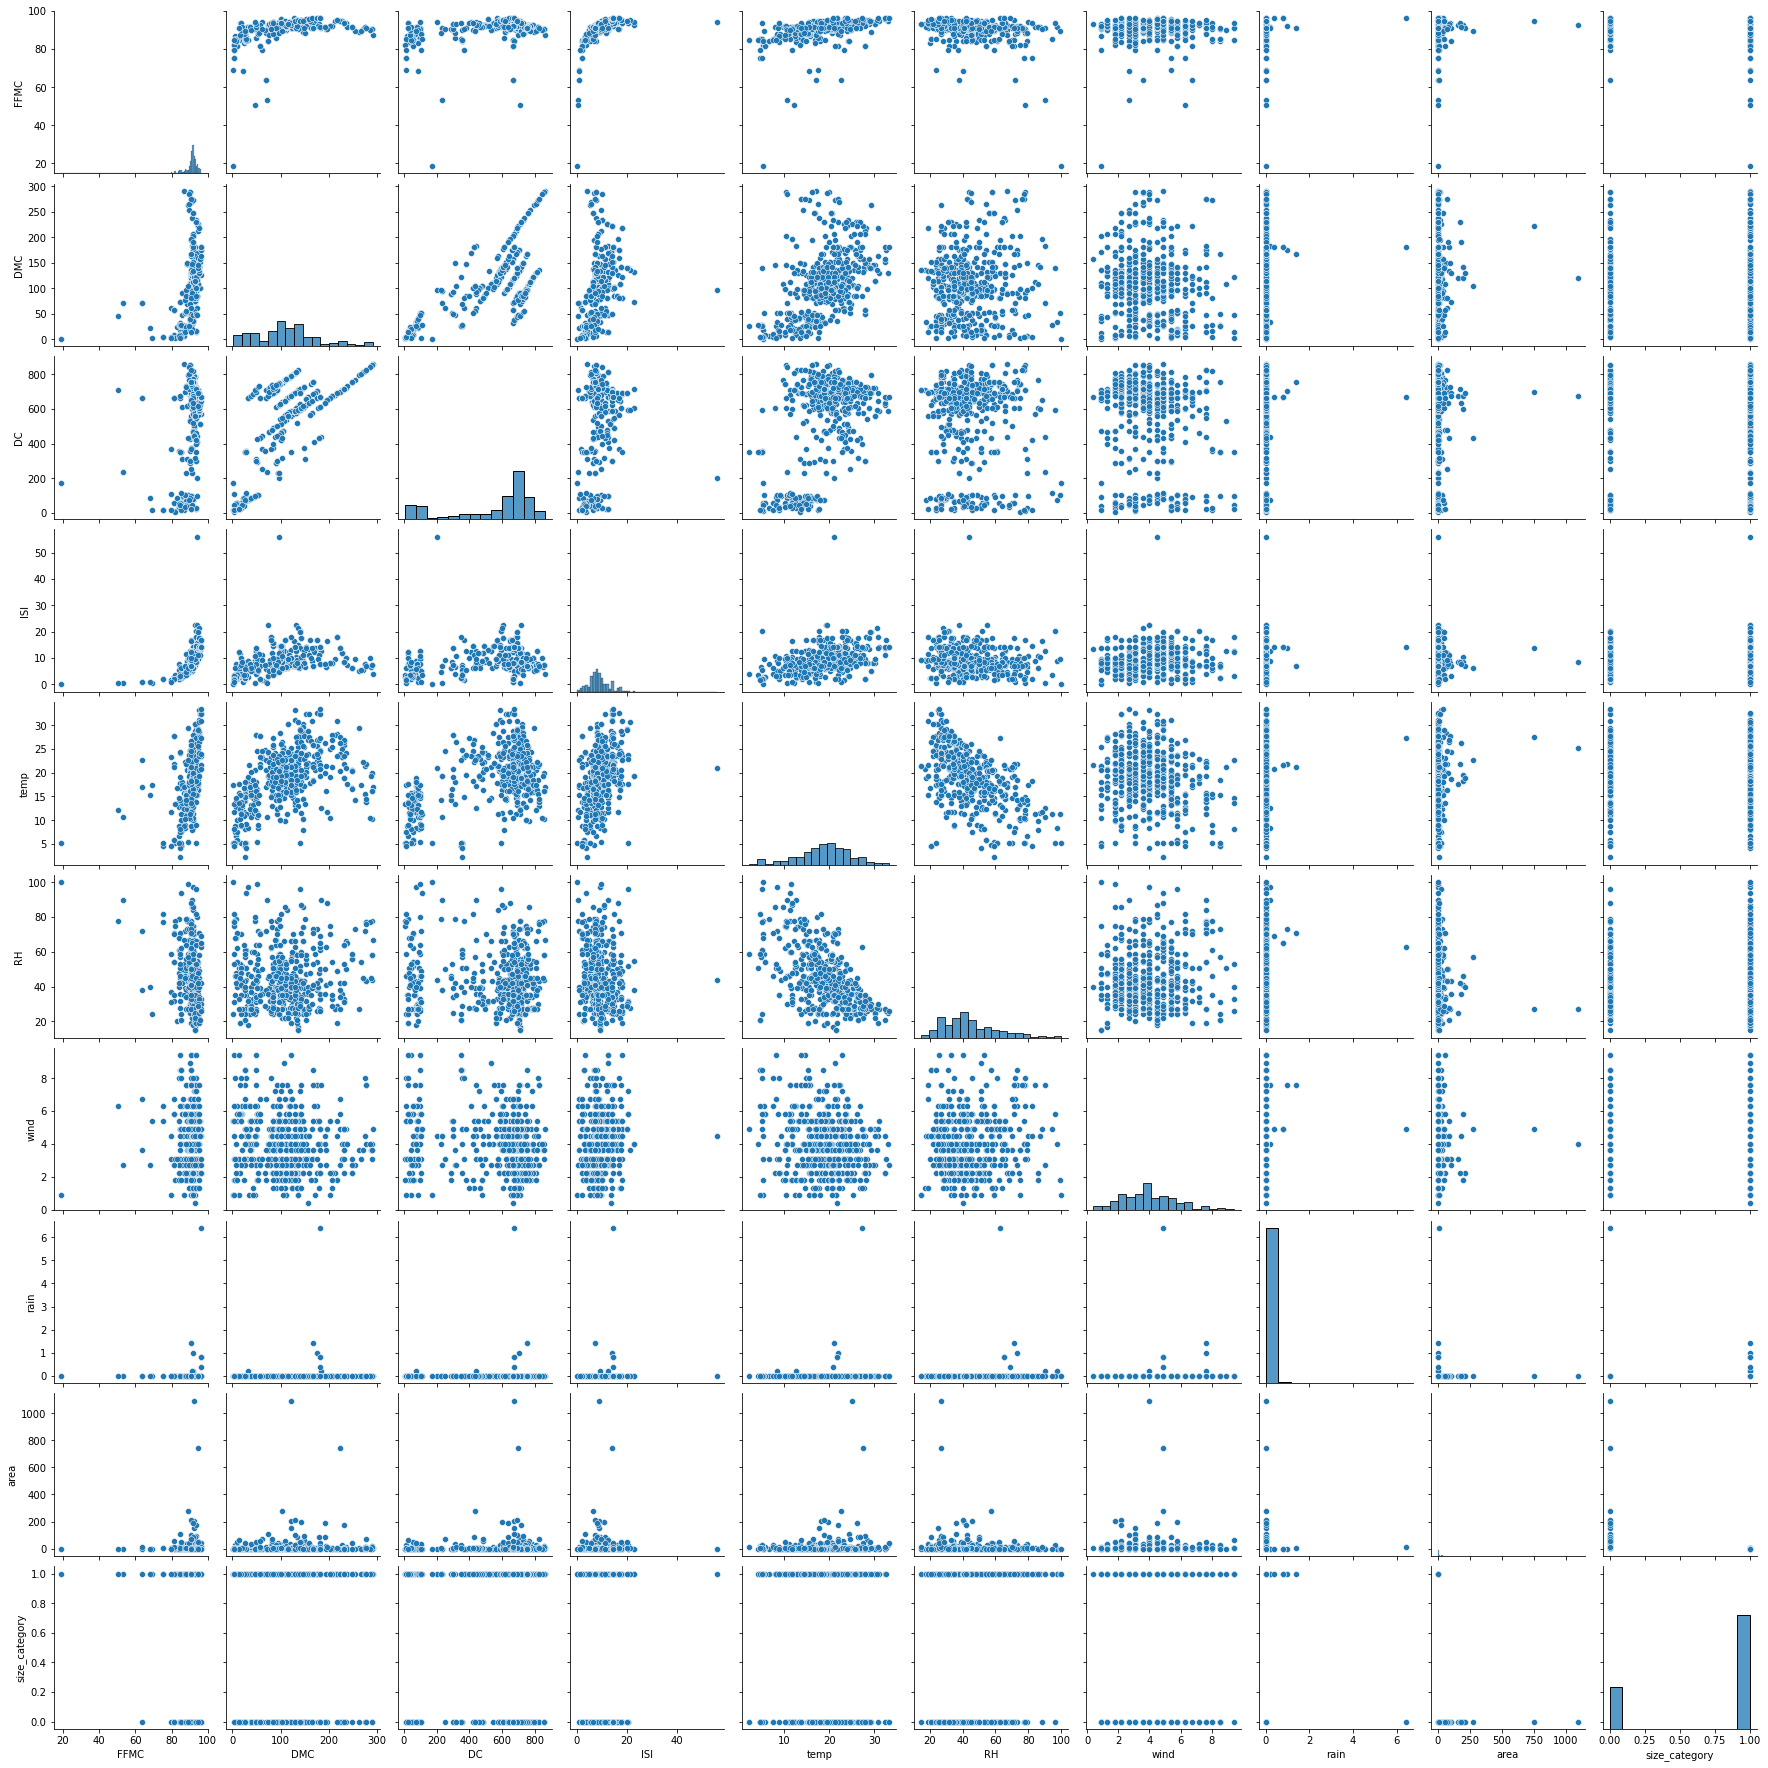

In [24]:
pair_data = pd.concat([drop_data.iloc[:,0:9],drop_data.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()

### Model Building

In [25]:
x = drop_data.drop(labels='size_category',axis = 1)
y = drop_data[['size_category']]

In [26]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.3,random_state=12)

In [27]:
x_train.shape,y_train.shape

((361, 28), (361, 1))

In [28]:
y_train.shape,y_train.shape

((361, 1), (361, 1))

### Our Data Is Imbalance so i have to balance it , so i m using here smote operation of balancing technique

In [29]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
 534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
 537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   
 
      rain       area  dayfri  ...  monthdec  mont

In [30]:
x_train_sm.shape,y_train_sm.shape

((538, 28), (538,))

In [31]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

### Convert Data into standard scale

In [32]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.96774194, 0.34683281, 0.53209818, ..., 0.        , 0.        ,
        0.        ],
       [0.95612903, 0.40809969, 0.91527024, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96954562, 0.27960713, 0.80122036, ..., 0.        , 0.        ,
        1.        ],
       [0.94336113, 0.58192462, 0.73652119, ..., 0.        , 0.        ,
        0.        ],
       [0.97051055, 0.57059336, 0.82401391, ..., 0.        , 0.        ,
        0.        ]])

In [33]:
X_test = scale.fit_transform(x_test)
X_test

array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

### Model Training

#### Tuning of Hyperparameter : Batch size and Epoch

In [34]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [35]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,30]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.565 total time=   0.9s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.676 total time=   0.7s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.583 total time=   0.6s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.692 total time=   0.7s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   0.8s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.787 total time=   1.0s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.694 total time=   1.1s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.213 total time=   1.0s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.822 total time=   1.3s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.636 total time=   1.4s
[CV 1/5] END ..........batch_size=10, epochs=30;, score=0.778 total time=   1.4s
[CV 2/5] END ..........batch_size=10, epochs=30;,

In [36]:
print(gsv_res.best_params_,gsv_res.best_score_)

{'batch_size': 10, 'epochs': 30} 0.8255624771118164


#### Turning Hyperparameter: Learning rate and Dropout rate

In [37]:
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [38]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 30,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.213 total time=   1.3s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.694 total time=   1.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.213 total time=   1.2s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.271 total time=   1.8s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   1.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.861 total time=   1.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.759 total time=   1.5s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.833 total time=   1.4s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.850 total time=   1.4s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.981 total time=   1.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   1.1s
[CV 2/5] END dropout_rate=0.0, 

In [39]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.01} 0.8608342170715332


#### Tuning of Hyperparameter :Activation Function & Kernel Initializer

In [40]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [41]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 30,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.870 total time=   1.4s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.704 total time=   1.4s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.843 total time=   1.3s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.271 total time=   1.4s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.000 total time=   1.6s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.880 total time=   1.2s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.787 total time=   1.2s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.796 total time=   1.2s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.897 total time=   1.3s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.972 total time=   1.6s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.796 total time=   1.3s
[CV 2/5] END Activat

In [42]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.8664762735366821 {'Activation_Function': 'linear', 'init': 'normal'}


#### Tuning of Hyperparameter :Number of Neurons in hidden layer

In [43]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [44]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 30,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.907 total time=   1.1s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.852 total time=   1.2s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.880 total time=   1.2s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.888 total time=   1.7s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.991 total time=   1.3s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.898 total time=   1.3s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.824 total time=   1.4s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.796 total time=   1.0s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.888 total time=   1.6s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.991 total time=   1.2s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.833 total time=   1.2s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [45]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.9165455222129821 {'neuron1': 16, 'neuron2': 4}


### Train a model with optimum values of hyperparameter

In [46]:
# best Parameters
# batch_size = 10
# epochs = 30
# dropout_rate = 0.1
# learning rate = 0.01
# activation_function = tanh
# kernel_initiative = uniform
# neuron1 = 16
# neuron2 = 4

In [47]:
def creat_model():
    model = Sequential()
    model.add(Dense(16,input_dim=28,kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [48]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 30)
model.fit(X_train,y_train)

Epoch 1/30
54/54 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5948
Epoch 2/30
54/54 [==============================] - 0s 884us/step - loss: 0.4872 - accuracy: 0.7751
Epoch 3/30
54/54 [==============================] - 0s 744us/step - loss: 0.3985 - accuracy: 0.8457
Epoch 4/30
54/54 [==============================] - 0s 788us/step - loss: 0.4227 - accuracy: 0.8104
Epoch 5/30
54/54 [==============================] - 0s 830us/step - loss: 0.3927 - accuracy: 0.8271
Epoch 6/30
54/54 [==============================] - 0s 835us/step - loss: 0.3670 - accuracy: 0.8494
Epoch 7/30
54/54 [==============================] - 0s 857us/step - loss: 0.3637 - accuracy: 0.8290
Epoch 8/30
54/54 [==============================] - 0s 775us/step - loss: 0.3380 - accuracy: 0.8680
Epoch 9/30
54/54 [==============================] - 0s 750us/step - loss: 0.3534 - accuracy: 0.8532
Epoch 10/30
54/54 [==============================] - 0s 755us/step - loss: 0.3302 - accuracy: 0.8532
E

In [49]:
y_predict = model.predict(X_train)

In [50]:
accuracy_score(y_train,y_predict)

0.9200743494423792

In [51]:
confusion_matrix(y_train,y_predict)

array([[226,  43],
       [  0, 269]], dtype=int64)

In [52]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       269
           1       0.86      1.00      0.93       269

    accuracy                           0.92       538
   macro avg       0.93      0.92      0.92       538
weighted avg       0.93      0.92      0.92       538



In [58]:
# testing data
y_test_pred = model.predict(X_test)

In [59]:
accuracy_score(y_test,y_test_pred)

0.8525641025641025

In [60]:
confusion_matrix(y_test,y_test_pred)

array([[46,  1],
       [22, 87]], dtype=int64)

In [61]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80        47
           1       0.99      0.80      0.88       109

    accuracy                           0.85       156
   macro avg       0.83      0.89      0.84       156
weighted avg       0.89      0.85      0.86       156



* Here we create model by using optimum value of hyperparameter it gives a approximately 90% accuracy score

# THE END 